# <img style="float: left; padding-right: 20px; width: 200px" src="https://raw.githubusercontent.com/raxlab/imt2200-data/main/media/logo.jpg">  IMT 2200 - Introducción a Ciencia de Datos
**Pontificia Universidad Católica de Chile**<br>
**Instituto de Ingeniería Matemática y Computacional**<br>
**Semestre 2024-S2**<br>
**Profesor:** Rodrigo A. Carrasco <br>
**Integrantes:** Diego Olivares, Amelie Ramirez y Zhibin Xue <br>

# <h1><center>Análisis de Tendencias en Videos Musicales de YouTube: Patrones que Influyen en el Éxito de los Videos Musicales</center></h1>

## Introducción

Debido a la gran cantidad de información extraida se tomó la decisión de crear tres ``noteboks`` distintos para la recolección de datos estos se guardaran en la carpeta ``data/`` al igual que la información recolectada:

Estos se tienen que ejecutar en este orden:
1. ``youtube.ipynb``
2. ``spotify.ipynb``
3. ``last.fm.ipynb``

## Imports

In [15]:
import os
import pandas as pd
import seaborn as sns

## Contexto y motivación

Frente al contexto de la gran era de la digitalización el humano obtiene nuevos recursos como lo son l poder escuchar múscia atraves de dispositivos electronicos ya sea: celulares, computadores, radio, etc. De esto surguen famosos aplicaciones como lo es Spotify una gran aplicacion de streaming que le proporciona al usuario una experiencia unica y personalizada atraves de playlist hechas 100% a su gusto. Otras como Youtube una gran plataforma de videos que maneja un algoritmo pra entregarle, tabien, una experiencia unca al usuario. Por ultimo tmabine tenemos Last.fm una red social hecha exclusivamente con un enfoque musica para dar recomendaciones hay más peronalizadas.
Gracias a esto, tenemos un gran avance en la digitalizacion músical, ayuando a artistas a er reconocido a nivel mundial llenando conciertos, creando hit y ganando premios. Pero ¿Como se reconoce un hit mundial? aal ser la música un invento que a acompañado al hombre a traves de las epocas, que es lo que diferencia a las canciones que usan los mismos metoos musicales tales como ritmo, letra o toaalidades a ser más famosas que otras. ¿Que parametros miden lo famosa que sera una cancion?. 
Al unir ambas ideas, es decir, tanto las aplicaciones y la pregunta de que hace una cancion famosa, podemos arle un enfoque de datos y fucionar las ideas.
Es asi como nace nuestro proyecto de encotrar, atraves de estas tres aplicaciones los parametros que hacen que una cancion sea un hit mundial 

## Preguntas objetivo

De las preguntas originales, se pudieron responder las siguientes:

1. ¿Qué características de los videos están más correlacionadas con un mayor número de visualizaciones? (likes, comentarios y etiquetas)

2. ¿La popularidad de una canción en otras plataformas como Spotify o Last.fm precede a su éxito en YouTube?

3. ¿Qué géneros musicales generan más interacciones en YouTube, y cómo esto se relaciona con las tendencias de escucha en Spotify o Last.fm?

4. ¿Cuál es la relación entre el número de visualizaciones en YouTube y la popularidad en Spotify? ¿A qué se debe?

5. ¿Cómo varía la tendencia de videos populares según la región?¿Y cómo esto refleja la cultura musical del país?

6. ¿Hay patrones de días u horarios en que se suben los videos más exitosos?

Las nueas preguntas que surgieron son:

1. ¿Qué categorias están más relacionadas entre si?

2. ¿Se puede hacer un modelo para predecir que tan popular será una canción en spotify en base a su éxito en Youtube?

## Análisis exploratorio de datos

### 1. ¿Qué características de los videos están más correlacionadas con un mayor número de visualizaciones? (likes, comentarios y etiquetas)

In [ ]:
# Creamos un dataframe en conjunto para el análisis

yt_chile = pd.read_csv("data/videos_chile.csv")
yt_global = pd.read_csv("data/videos_global.csv")
yt_eeuu = pd.read_csv("data/videos_eeuu.csv")

yt_merged = pd.concat([yt_global, yt_eeuu, yt_chile]).drop_duplicates().reset_index(drop=True)
yt_merged


,Titulo,Vistas,Likes,Comentarios,Fecha,Tags
0,"KAROL G, Feid, DFZM ft. Ovy On The Drums, J Ba...",15598352,883849,73874,2024-11-08T00:00:06Z,['#57']
1,YoungBoy Never Broke Again - Sneaking [Officia...,1029066,75819,3901,2024-11-08T03:41:23Z,[]
2,YoungBoy Never Broke Again - Killa Season [Off...,1164882,81449,4392,2024-11-08T04:16:17Z,[]
3,YoungBoy Never Broke Again - Missing Everythin...,1132351,86119,6341,2024-11-08T02:20:12Z,[]
4,YoungBoy Never Broke Again - Catch Me [Officia...,812399,55568,2963,2024-11-08T02:20:09Z,[]
...,...,...,...,...,...,...
82,"LIT killah, TULI - MALA SUERTE (Official Video)",514359,51016,1321,2024-11-08T22:00:07Z,"['#MALASUERTE', '#TULI']"
83,Pac-Man vs Kirby. Épicas Batallas de Rap del F...,428853,50316,4518,2024-11-07T20:00:06Z,[]
84,"Valentino merlo, Salastkbron - Me voy (Officia...",713734,27106,1267,2024-11-07T23:00:08Z,[]
85,Lo Grande Que Es Perdonar (feat. Gilberto Sant...,680358,3230,30,2024-11-01T04:00:21Z,[]


<Axes: xlabel='Vistas', ylabel='Likes'>

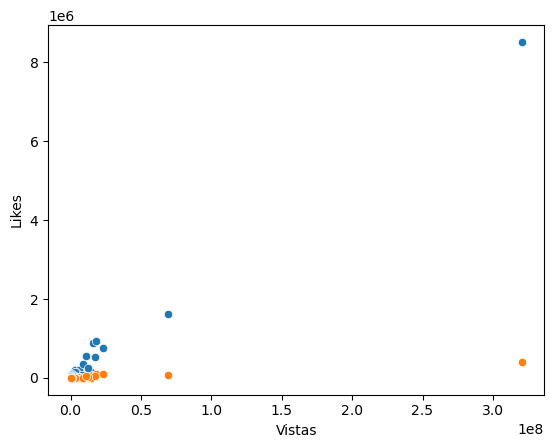

In [23]:
# Revisamos las correlaciones

sns.scatterplot(x='Vistas', y='Likes', data=yt_merged)
sns.scatterplot(x='Vistas', y='Comentarios', data=yt_merged)

In [28]:
correlaciones = yt_merged[["Vistas", "Likes", "Comentarios"]]

#sns.pairplot(correlaciones)

<Axes: xlabel='Vistas', ylabel='Likes'>

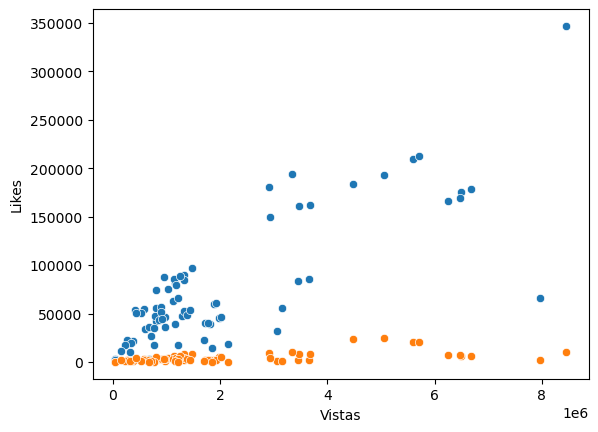

In [ ]:
# Quitamos los datos mayores puesto que hacen que el rango sea muy grande
correlaciones = correlaciones[correlaciones["Comentarios"] < 390972]
correlaciones = correlaciones[correlaciones["Vistas"] < 8515277]

sns.scatterplot(x='Vistas', y='Likes', data=correlaciones)
sns.scatterplot(x='Vistas', y='Comentarios', data=correlaciones)


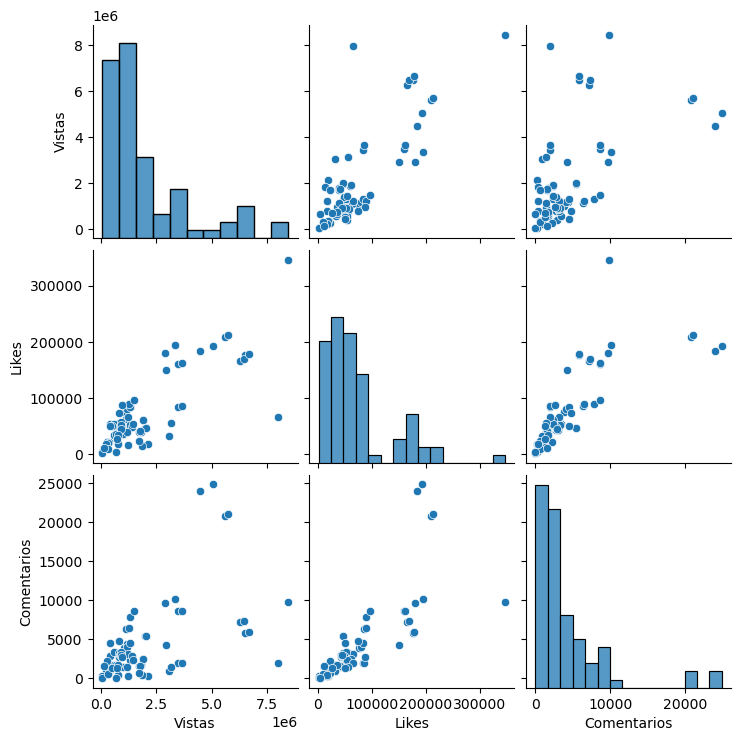

In [36]:
sns.pairplot(correlaciones)

<Axes: >

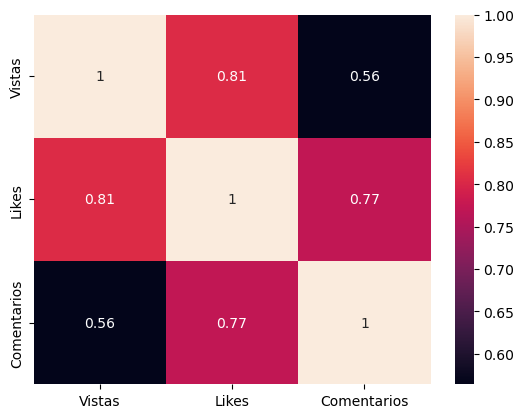

In [37]:
sns.heatmap(correlaciones.corr(),annot=True)

### 2. ¿La popularidad de una canción en otras plataformas como Spotify o Last.fm precede a su éxito en YouTube?

In [40]:
# Para responder estas preguntas analizaremos cuantas peliculas están dentro de los dos dataframes

sp_chile = pd.read_csv("data/spotify_chile.csv")
sp_global = pd.read_csv("data/spotify_global.csv")
sp_eeuu = pd.read_csv("data/spotify_eeuu.csv")
sp_merged = pd.concat([sp_global, sp_eeuu, sp_chile]).drop_duplicates().reset_index(drop=True)

last_chile = pd.read_csv("data/last.fm_chile.csv")
last_global = pd.read_csv("data/last.fm_global.csv")
last_eeuu = pd.read_csv("data/last.fm_eeuu.csv")
last_merged = pd.concat([last_global, last_eeuu, last_chile]).drop_duplicates().reset_index(drop=True)

### 3. ¿Qué géneros musicales generan más interacciones en YouTube, y cómo esto se relaciona con las tendencias de escucha en Spotify o Last.fm?

### 4. ¿Cuál es la relación entre el número de visualizaciones en YouTube y la popularidad en Spotify? ¿A qué se debe?

### 5. ¿Cómo varía la tendencia de videos populares según la región?¿Y cómo esto refleja la cultura musical del país?

### 6. ¿Hay patrones de días u horarios en que se suben los videos más exitosos?

## Analisis de datos

In [5]:
print("pene")
print('hola')
print("slkjfklsjfkjsfjklsjksjfk")

## Resumen de los resusltados

## ¿Qué podría salir mal?